<h1>Pymaceuticals Data Analysis</h1>


## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
study_data.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume_mm3"})
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_calc=study_data[["Drug Regimen","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
summary_data_grouped = summary_calc.groupby(['Drug Regimen','Timepoint'])


tumor_mean = summary_data_grouped['Tumor Volume (mm3)'].mean()

df = pd.DataFrame(tumor_mean)
df_pivot = pd.pivot_table(df, values='Tumor Volume (mm3)', index=['Drug Regimen'],
                   columns=['Timepoint'], aggfunc=np.mean)
df_pivot["Tumor Volume Mean (mm3)"] = df_pivot.iloc[:, 0:10].mean(axis=1)
df_pivot["Tumor Volume Median (mm3)"] = df_pivot.iloc[:, 0:10].median(axis=1)
df_pivot["Tumor Volume Variance (mm3)"] = df_pivot.iloc[:, 0:10].var(axis=1)
df_pivot["Tumor Volume Std Dev (mm3)"] = df_pivot.iloc[:, 0:10].std(axis=1)
df_pivot["Tumor Volume SEM (mm3)"] = df_pivot.iloc[:, 0:10].sem(axis=1)
summary = df_pivot[["Tumor Volume Mean (mm3)","Tumor Volume Median (mm3)","Tumor Volume Variance (mm3)","Tumor Volume Std Dev (mm3)", "Tumor Volume SEM (mm3)"]]
summary = summary.sort_values(by="Tumor Volume Mean (mm3)", ascending=True)

summary

Timepoint,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Std Dev (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Ramicane,39.986931,39.606312,10.630245,3.260406,1.031031
Capomulin,40.485084,40.327927,9.426531,3.070266,0.970903
Ceftamin,53.752434,53.222361,41.933072,6.475575,2.047757
Zoniferol,54.660451,54.301634,49.165446,7.011808,2.217328
Infubinol,54.911474,54.456472,49.604518,7.043048,2.227207
Propriva,54.911934,54.425438,49.285862,7.020389,2.220042
Naftisol,55.891024,55.188028,68.470738,8.274705,2.616691
Stelasyn,55.949437,55.071451,62.401646,7.899471,2.498032
Placebo,56.012209,55.923495,61.457850,7.839506,2.479069


## Bar plots

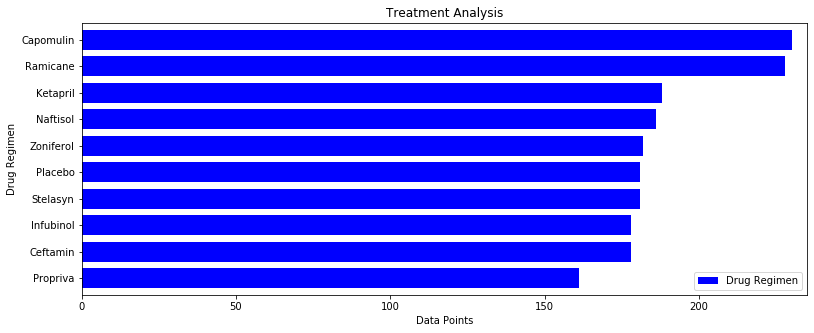

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = study_data['Drug Regimen'].value_counts()
dF = pd.DataFrame(data_points)
dF = dF.reset_index(drop=False)
dF = dF.sort_values(by="Drug Regimen", ascending=True)

x_axis= 'index'
y_axis = 'Drug Regimen'
pandas_bar = dF.plot.barh(x_axis, y_axis, title='Treatment Analysis', xlim=(0,235), ylim=(0,10), color="blue", 
                          figsize = (13,5), width = 0.75)
pandas_bar.set_ylabel("Drug Regimen")
pandas_bar.set_xlabel("Data Points")


pandas_bar

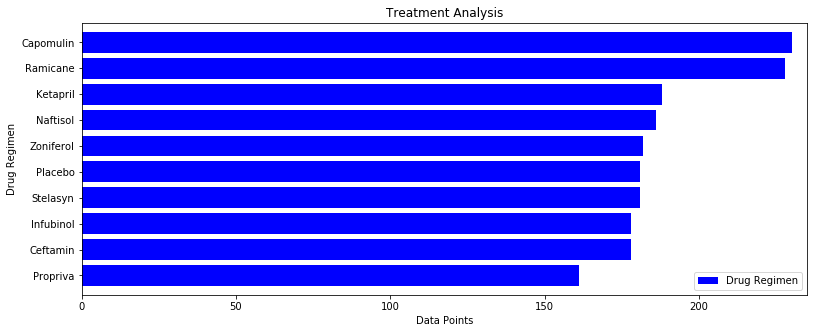

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis= np.arange(len(dF))
y_axis = dF["Drug Regimen"]
plt.figure(figsize=(13,5))
bar_chart = plt.barh(x_axis, y_axis, color = 'b', alpha= 1, align='center', label='Drug Regimen') 
plt.xlim(0,235)
plt.ylim(-0.75,9.75)

plt.title('Treatment Analysis')
plt.xlabel("Data Points")
plt.ylabel("Drug Regimen")
plt.legend(loc='best')

tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, dF["index"], rotation="horizontal")



plt.show()

## Pie plots

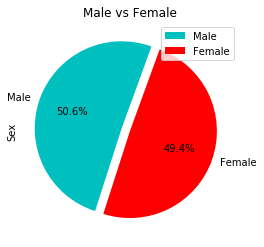

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male = (len(study_data.loc[study_data["Sex"] == "Male",:])/len(study_data["Sex"]))*100
female = (len(study_data.loc[study_data["Sex"] == "Female",:])/len(study_data["Sex"]))*100
sex_df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
sex_df = sex_df.set_index('Mice')

plot = sex_df.plot.pie(y="Sex", figsize =(4, 4), explode=(0.1,0), colors = 'cr', autopct='%1.1f%%',startangle = 70, title="Male vs Female")

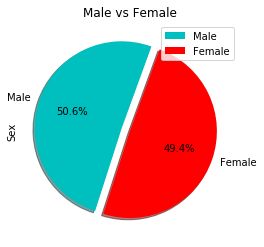

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = (len(study_data.loc[study_data["Sex"] == "Male",:])/len(study_data["Sex"]))*100
female = (len(study_data.loc[study_data["Sex"] == "Female",:])/len(study_data["Sex"]))*100
sex_df = pd.DataFrame({"Sex": [male, female], "Mice":["Male", "Female"]})
sex_df = sex_df.set_index('Mice')
sizes =[male, female]
colors = ["c", "r"]
labels = ["Male","Female"]
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
plt.legend(labels, loc='best')
explode = (0.1, 0)
pie_chart = plt.pie(sizes, labels = labels,explode=explode, autopct = '%1.1f%%', colors=colors, startangle = 70, shadow = True)
plt.legend(labels, loc='best')
plt.title('Male vs Female')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
most_promise=study_data[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]\
        .groupby(["Mouse ID", "Drug Regimen" ]).last()\
        .sort_values(by = "Drug Regimen", ascending = True).reset_index()
most_promise.set_index(["Drug Regimen", "Mouse ID"], inplace =True)

capomulin = most_promise.loc['Capomulin']["Tumor Volume (mm3)"]
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
lower_capomulin = quartiles_capomulin[.25]
upper_capomulin = quartiles_capomulin[.75]
iqr_capomulin = upper_capomulin-lower_capomulin
capomulin_outliers = []
for value in capomulin:
    if value > upper_capomulin + 1.5*iqr_capomulin:
        capomulin_outliers.append(value)
    elif value < lower_capomulin - 1.5*iqr_capomulin:
        capomulin_outliers.append(value)
print(f"There is(are) " + str(len(capomulin_outliers)) + " outlier(s) in Campomulin and here is a list: " + str(capomulin_outliers))
    
ramicane = most_promise.loc['Ramicane']["Tumor Volume (mm3)"]
quartiles_ramicane = ramicane.quantile([.25,.5,.75])
lower_ramicane = quartiles_ramicane[.25]
upper_ramicane = quartiles_ramicane[.75]
iqr_ramicane = upper_ramicane-lower_ramicane
ramicane_outliers = []
for value in ramicane:
    if value > upper_ramicane + 1.5*iqr_ramicane:
        ramicane_outliers.append(value)
    elif value < lower_ramicane - 1.5*iqr_ramicane:
        ramicane_outliers.append(value)
print(f"There is(are) " + str(len(ramicane_outliers)) + " outlier(s) in Ramicane and here is a list: " + str(ramicane_outliers))

infubinol = most_promise.loc['Infubinol']["Tumor Volume (mm3)"]
quartiles_infubinol = infubinol.quantile([.25,.5,.75])
lower_infubinol = quartiles_infubinol[.25]
upper_infubinol = quartiles_infubinol[.75]
iqr_infubinol = upper_infubinol-lower_infubinol
infubinol_outliers = []
for value in infubinol:
    if value > upper_infubinol + 1.5*iqr_infubinol:
        infubinol_outliers.append(value)
    elif value < lower_infubinol - 1.5*iqr_infubinol:
        infubinol_outliers.append(value)
print(f"There is(are) " + str(len(infubinol_outliers)) + " outlier(s) in Infubinol and here is a list: " + str(infubinol_outliers))


ceftamin = most_promise.loc['Ceftamin']["Tumor Volume (mm3)"]
quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
lower_ceftamin = quartiles_ceftamin[.25]
upper_ceftamin = quartiles_ceftamin[.75]
iqr_ceftamin = upper_ceftamin-lower_ceftamin
ceftamin_outliers = []
for value in ceftamin:
    if value > upper_ceftamin + 1.5*iqr_ceftamin:
        ceftamin_outliers.append(value)
    elif value < lower_ceftamin - 1.5*iqr_ceftamin:
        ceftamin_outliers.append(value)
print(f"There is(are) " + str(len(ceftamin_outliers)) + " outlier(s) in Ceftamin and here is a list: " + str(ceftamin_outliers))



There is(are) 0 outlier(s) in Campomulin and here is a list: []
There is(are) 0 outlier(s) in Ramicane and here is a list: []
There is(are) 1 outlier(s) in Infubinol and here is a list: [36.321345799999996]
There is(are) 0 outlier(s) in Ceftamin and here is a list: []


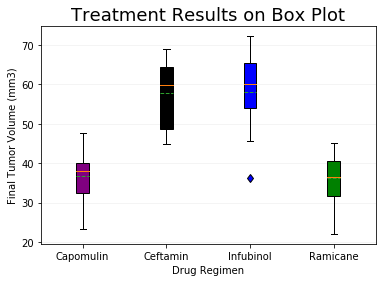

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin = list(capomulin)
ceftamin = list(ceftamin)
infubinol = list(infubinol)
ramicane = list(ramicane)

fig1, ax = plt.subplots()
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])
circle = dict(markerfacecolor='purple', marker='o')
square = dict(markerfacecolor='black', marker='s')
diamond = dict(markerfacecolor='b', marker='d')
pentagon = dict(markerfacecolor='g', marker='p')
data = [capomulin, ceftamin, infubinol, ramicane]
ax.set_title("Treatment Results on Box Plot", fontsize = 18)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.3)

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
box1 = ax.boxplot(capomulin, positions = [1], flierprops=circle, showmeans=True, meanline=True, patch_artist=True)
box2 = ax.boxplot(ceftamin, positions = [2], flierprops=square, showmeans=True, meanline=True,patch_artist=True)
box3 = ax.boxplot(infubinol,positions = [3], flierprops=diamond, showmeans=True, meanline=True, patch_artist=True)
box4 = ax.boxplot(ramicane,positions = [4], flierprops=pentagon, showmeans=True, meanline=True, patch_artist=True)
c1=['purple']
c2=['black']
c3=['blue']
c4=['green']
for patch, color in zip(box1['boxes'], c1):
    patch.set_fc(color)
for patch, color in zip(box2['boxes'], c2):
    patch.set_fc(color)
for patch, color in zip(box3['boxes'], c3):
    patch.set_fc(color)
for patch, color in zip(box4['boxes'], c4):
    patch.set_fc(color)

plt.show()


## Line and scatter plots

,Timepoint,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,0,b128,45.000000
Capomulin,5,b128,45.651331
Capomulin,10,b128,43.270852
Capomulin,15,b128,43.784893
Capomulin,20,b128,42.731552
Capomulin,25,b128,43.262145
Capomulin,30,b128,40.605335
Capomulin,35,b128,37.967644
Capomulin,40,b128,38.379726


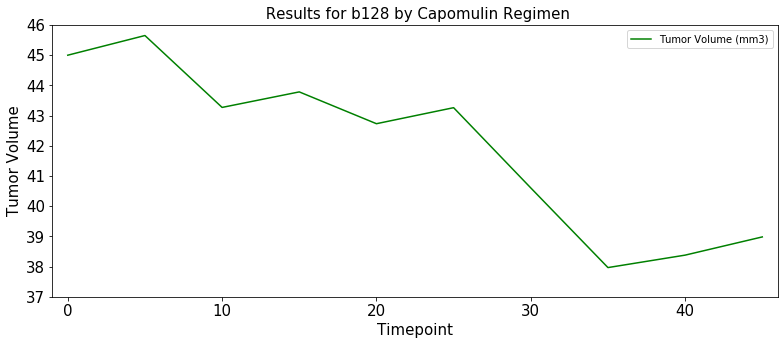

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data =study_data[["Drug Regimen","Timepoint", "Mouse ID","Tumor Volume (mm3)"]]
capomulin_data.set_index(["Drug Regimen"], inplace =True)
capomulin_data = capomulin_data.loc["Capomulin", :]
capomulin_data = capomulin_data.sort_values(by="Mouse ID", ascending = True)
capomulin_data = capomulin_data.head(10)
capomulin_data = capomulin_data.sort_values(by="Timepoint", ascending = True)

line= capomulin_data.plot.line(x="Timepoint", y="Tumor Volume (mm3)", xlim=(-1,46), ylim=(37,46),color="green", 
                               figsize = (13,5), fontsize = 15)
line.set_ylabel("Tumor Volume", fontsize = 15)
line.set_xlabel("Timepoint", fontsize = 15)
line.set_title(' Results for b128 by Capomulin Regimen', fontsize=15)
capomulin_data

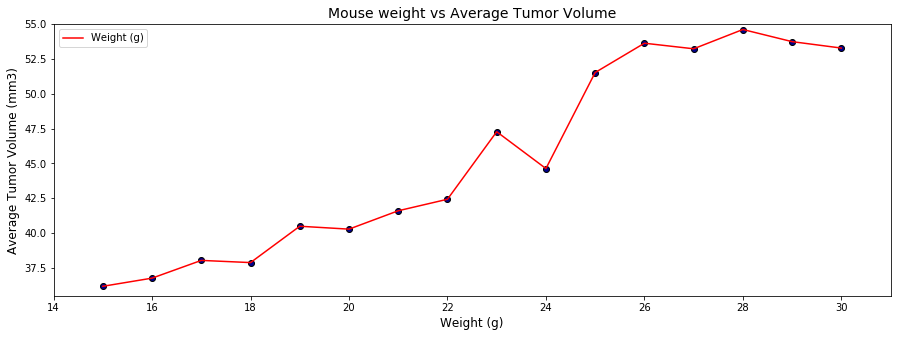

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = study_data[["Drug Regimen","Tumor Volume (mm3)","Weight (g)"]]\
        .groupby(["Weight (g)"]).mean()
weight_df = weight_df.reset_index(drop=False)
weight_df
plt.figure(figsize=(15,5))
plt.xlim(14,31)
plt.ylim(35.5,55)
plt.scatter(weight_df['Weight (g)'], weight_df['Tumor Volume (mm3)'], marker="o", facecolors="DarkBlue", edgecolors="black")
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 12)
plt.xlabel("Weight (g)", fontsize = 12)
plt.title("Mouse weight vs Average Tumor Volume", fontsize=14)
plt.plot(weight_df['Weight (g)'], weight_df['Tumor Volume (mm3)'], color='red', label="Weight (g)")
plt.legend(loc="best")


plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen